## Problem Statement:
### Construct a model with Logistic Regression that uses available data about the passengers to predict their survival.

#### Importing Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the file for Analysis 

In [3]:
titanic=pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\titanic.csv") #Importing Data

In [4]:
#Checking rows and Column
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Looking after the categories of columns

In [5]:
print(titanic['Survived'].unique())
print(titanic['Pclass'].unique())
print(titanic['SibSp'].unique())
print(titanic['Parch'].unique())
print(titanic['Cabin'].unique())
print(titanic['Embarked'].unique())

[0 1]
[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148

#### Predictors description
<li> PassengerId </li>
<li> Survived (0 = No; 1 = Yes) </li>
<li> Pclass A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower </li>
<li> Name </li>
<li> Sex </li>
<li> Age </li>
<li> SibSp:  Number of Siblings/Spouses Aboard </li>
<li> Parch:  Number of Parents/Children Aboard </li>
<li> Ticket: Ticket Number </li>
<li> Fare:   Passenger Fare (British pound) </li>
<li> Cabin </li>
<li> Embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) </li>

###### Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic 
###### Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and FiancesIgnored)
###### Parent: Mother or Father of Passenger Aboard Titanic
###### Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

###### Few more information about data shape, data types, has null values in it or not

In [6]:
print(titanic.shape)
titanic.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### Checking for missing values total count and percentage of total data along with visualization or I can say another way to check missing values in data easily.


          Total     %
Cabin       687  77.1
Age         177  19.9
Embarked      2   0.2
Fare          0   0.0
Ticket        0   0.0


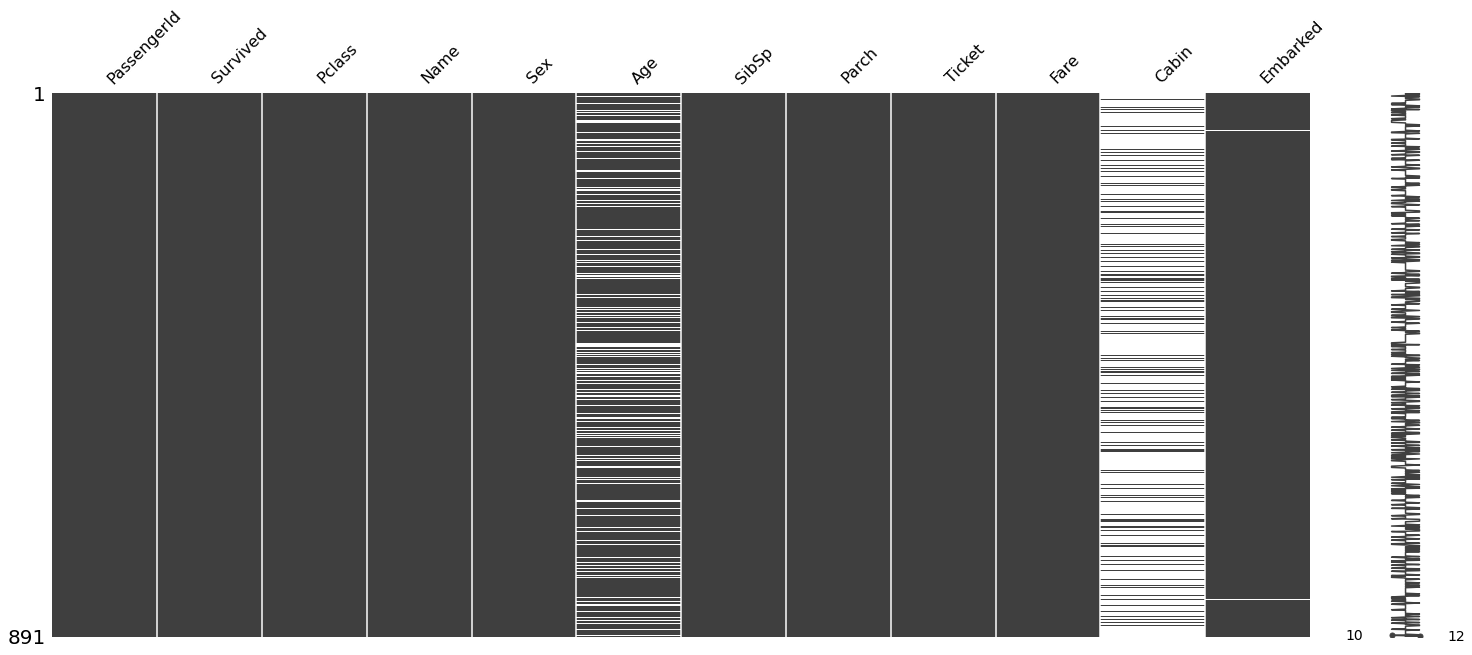

In [7]:
import missingno as msno
msno.matrix(titanic)
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
print(missing_data.head(5))

###### Getting Summary Statistics about data.
We can see that fare column has a outliers. as we can see 75% of data lies around value 31.000 and max value is 512.3292 

In [8]:
pd.options.display.float_format = '{:.4f}'.format
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0000,446.0000,257.3538,1.0000,223.5000,446.0000,668.5000,891.0000
Survived,891.0000,0.3838,0.4866,0.0000,0.0000,0.0000,1.0000,1.0000
Pclass,891.0000,2.3086,0.8361,1.0000,2.0000,3.0000,3.0000,3.0000
Age,714.0000,29.6991,14.5265,0.4200,20.1250,28.0000,38.0000,80.0000
SibSp,891.0000,0.5230,1.1027,0.0000,0.0000,0.0000,1.0000,8.0000
Parch,891.0000,0.3816,0.8061,0.0000,0.0000,0.0000,0.0000,6.0000
Fare,891.0000,32.2042,49.6934,0.0000,7.9104,14.4542,31.0000,512.3292


## Exploratory Data Analysis 

#### Viz 1:The Counplot plotted below shows Class wise survival of Passengers . We can see the survival to death ratio is High for Class 1 Passengers. 

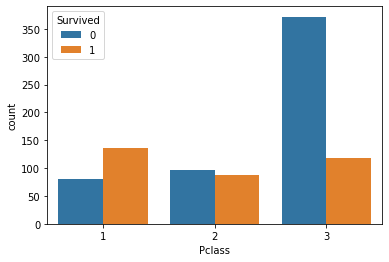

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)

We see that the probability that a Passengers of Class 3 has lower probability of Survival substantially lower than the Class 2 and Class 1 Passengers (47.28% and 62.96%). In the odds for a Passengers of Class 3 survival being much less than 1 (around 0.31), while the odds for class 1 is around 1.7 which is pretty much high.

In [10]:
c = pd.crosstab(titanic.Pclass, titanic.Survived).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

Survived,0,1,odds
Pclass,,,
1,0.3704,0.6296,1.7000
2,0.5272,0.4728,0.8969
3,0.7576,0.2424,0.3199


In [11]:
# So the odds of Survival of Pclass1/ Pclass 3 can be given as
Class1=1.7000
Class2=0.3199
Odds_Ratio=Class1/Class2
Odds_Ratio

5.314160675211003

The odds ratio of Survival, comparing Class1 to Class2, is around 5.314. In other words, Class 1 Passengers has around 5.314 times greater odds of survival than Class2 (in the population represented by these data).

###### Logodds Interpretation with some basic understanding:
**To interpret the log odds when comparing two groups, it is important to remember the following facts:**

1. A probability of 1/2, an odds of 1, and a log odds of 0 are all equivalent.

2. A positive log odds indicates that the first group being compared has greater odds (and greater probability) than the second group.

3. A negative log odds indicates that the second group being compared has greater odds (and greater probability) than the first group.

4. The scale of the log odds statistic is symmetric in the sense that a log odds of, say, 2, is equivalent in strength to a log odds of -2 (but with the groups swapped in terms of which has the greater probability).


So, From the above Interpretation of logodds we can say Class 1 Passengers has positive log odds which can be interpreted as it has greater probability of survival than Class 2 & Class 3 passengers.

In [12]:
c["logodds"] = np.log(c.odds)
c

Survived,0,1,odds,logodds
Pclass,,,,
1,0.3704,0.6296,1.7000,0.5306
2,0.5272,0.4728,0.8969,-0.1088
3,0.7576,0.2424,0.3199,-1.1398


#### Viz 2: Followed from the above graph. As we all know that Womens and Childrens were given first priority to be getting to life boats and then mens. So does 1st Class Passengers has more Female passengers compared with other two. Lets see throgh vizualization & Crosstab.
From the crosstab we can see that out of 94 1st class Females Passengers and 76  nd Class Females Passengers only 3 in 1st Class and 6 in 2nd class are reported to be not survived. Lets See through Vizualization.

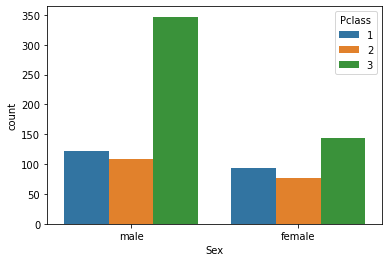

In [13]:
sns.countplot(x='Sex', hue='Pclass', data=titanic)

In [14]:
pd.crosstab([titanic.Sex, titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='Wistia')
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

We see that the probability that a Male Passengers has lower probability of Survival substantially lower than Female passengers (74.2%). In the odds for a Male Passengers survival being much less than 1 (around 0.2329), while the odds for Female passengers is around 2.8 which is pretty much higher than male odds.

In [15]:
d = pd.crosstab(titanic.Sex, titanic.Survived).apply(lambda x: x/x.sum(), axis=1)
d["odds"] = d.loc[:, 1] / d.loc[:, 0]
d

Survived,0,1,odds
Sex,,,
female,0.2580,0.7420,2.8765
male,0.8111,0.1889,0.2329


Looking at logodds of female and male Passengers, female passengers have positive log odds which can be interpreted as it has greater probability of survival than male passengers.

In [16]:
d["logodds"] = np.log(d.odds)
d

Survived,0,1,odds,logodds
Sex,,,,
female,0.2580,0.7420,2.8765,1.0566
male,0.8111,0.1889,0.2329,-1.4571


#### Viz 3: Lets see if embarked has any influence on survival. 
From the countplot plotted below we can see that People who boarded from "C" shows higher survival. Lets check if " Person boarding from C has high Female and Class 1 passengers or not using crosstab."

Text(0.5, 1.0, 'Survival by Embarked')

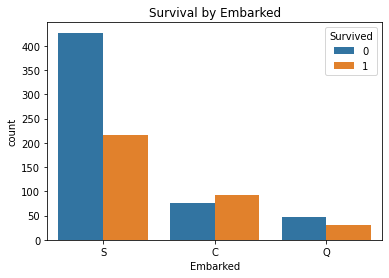

In [17]:
sns.countplot('Embarked',hue='Survived',data=titanic).set_title('Survival by Embarked')

In [18]:
pd.crosstab([titanic.Survived, titanic.Pclass,titanic.Embarked],titanic.Sex,margins=True).style.background_gradient(cmap='viridis')

##### From the above crosstab we can see person boarding from C has  43 first class Female out of which 42 survived. 

In [19]:
c = pd.crosstab(titanic.Embarked, titanic.Survived).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

Survived,0,1,odds
Embarked,,,
C,0.4464,0.5536,1.2400
Q,0.6104,0.3896,0.6383
S,0.6630,0.3370,0.5082


We see that the probability that a Passengers who boarded from Place C has higher Survival rate, higher than passengers boarding from Place Q and S.The possible reason could be the more number of female 1st class passengers from Place Q as we have already looked in above Crosstab.

#### Viz 4:  Fare variation Using Boxplot how it has varied as per class

Text(0.5, 1.0, 'Fare Distribution by Pclass')

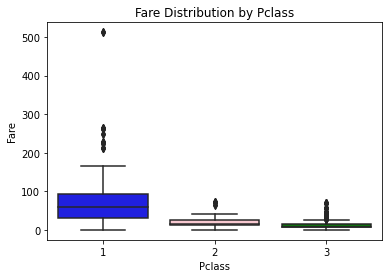

In [20]:
sns.boxplot("Pclass", "Fare", data=titanic, palette=["blue", "pink", "green"]).set_title('Fare Distribution by Pclass')

#### Viz 5: Fare distributions of survived vs. non survived passengers shown by kernel density estimate plot which shows the distribution of survived and not survived passengers based on fare.

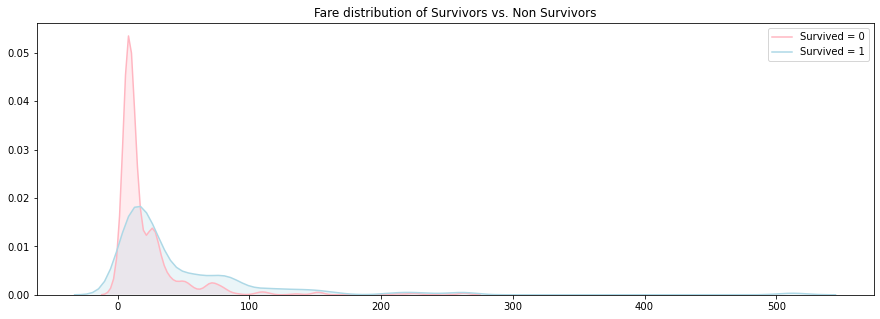

In [21]:
plt.figure(figsize = (15,5))
sns.kdeplot(titanic["Fare"][titanic.Survived == 0], color = "lightpink", shade = True)
sns.kdeplot(titanic["Fare"][titanic.Survived == 1], color = "lightblue", shade = True)
plt.title("Fare distribution of Survivors vs. Non Survivors")
plt.legend(['Survived = 0', 'Survived = 1'])


The spike in the plot under 50 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 50-60 dollars, the casualties went down and survival wentup. 

#### Viz 6: Checking the skewness of Fare

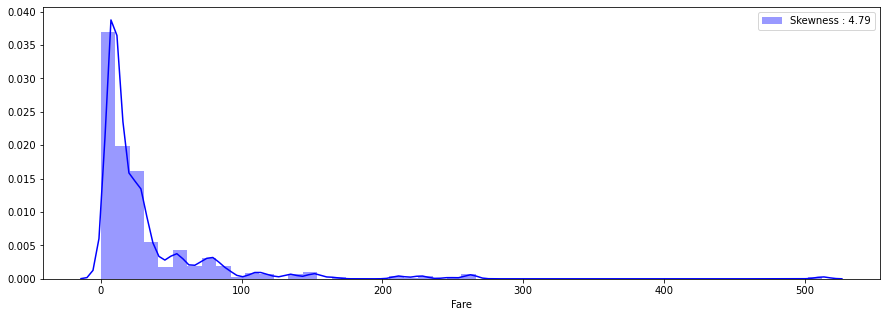

In [22]:
plt.figure(figsize = (15,5))
g = sns.distplot(titanic["Fare"], color="b", label="Skewness : %.2f"%(titanic["Fare"].skew()))
g = g.legend(loc="best")
# As we can see skewness value greater than 1 we can say the data is highly skewed which is because of Class 3 passengers 
# are more in compared to class 1 and class 2. So fares are skewed towards right.

#### Viz 7: From the below shown plot we can see People having age 30-40 has much survival rate than unsurvived.People with age 25 to 35 has more survival chance.  


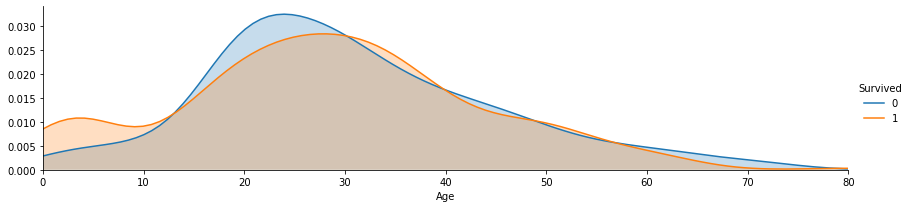

In [23]:
a = sns.FacetGrid(titanic, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 ,titanic['Age'].max()))
a.add_legend()

#### Viz 8:Created a violin plot to check the distribution of Age across the Survivors vs. Non Survivors for each Class & Gender

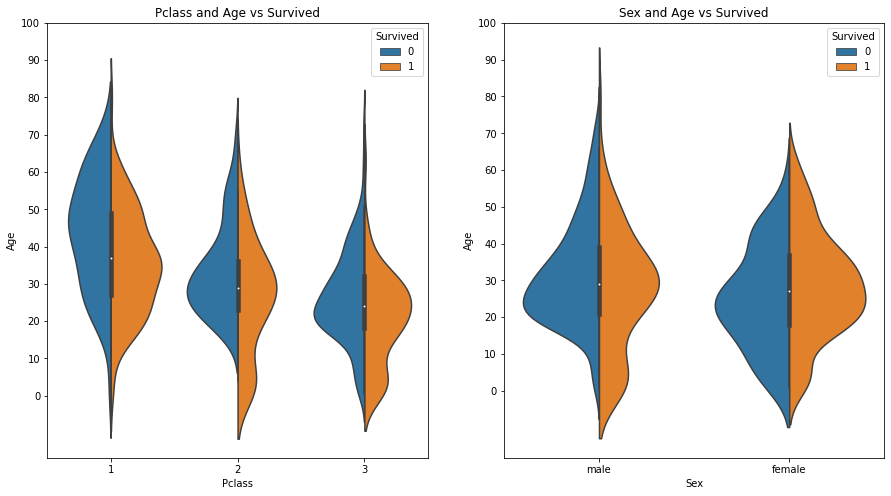

In [24]:
f, ax = plt.subplots(1,2,figsize=(15,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=titanic, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Assignment Objective 1: First, drop columns from the dataset that are obviously unnecessary for your model.
#### Assignment Objective 2: Then, assign the dataset's median Age to rows where the age data is missing.

In [25]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())  #Objective 2

In [26]:
print(titanic.groupby('Embarked').size())
#titanic.loc[(titanic.Embarked.isnull()),'Embarked'] = "S" 
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

Embarked
C    168
Q     77
S    644
dtype: int64


In [27]:
titanic['Fare'] = titanic['Fare'].astype(int)  #Converitng fare to int type

In [28]:
titanic.drop(['Cabin','PassengerId'],axis=1,inplace=True)  #Objective 1

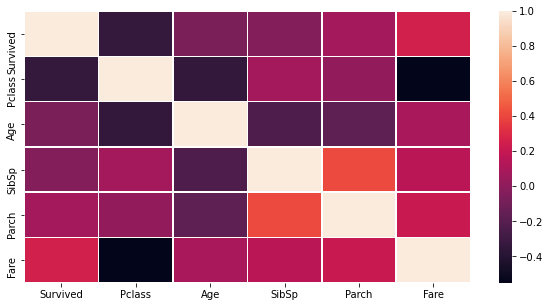

In [29]:
# SibSp and Parch is highly correlated 
my_corr=titanic.corr()
plt.figure(figsize=(10,5))
sns.heatmap(my_corr,linewidth=0.5)
plt.show()

In [30]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)   #Objective 1 Dropping Name and Ticket 

##### Using get_dummies doing feature transformation of Sex feature (Similar to One Hot Encoding), Embarked Feature 

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
pd.get_dummies(titanic['Sex'], prefix='Sex')
titanic = pd.concat([titanic, pd.get_dummies(titanic['Sex'], prefix='Sex')], axis=1)

In [32]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,male,22.0000,1,0,7,S,0,1
1,1,1,female,38.0000,1,0,71,C,1,0
2,1,3,female,26.0000,0,0,7,S,1,0
3,1,1,female,35.0000,1,0,53,S,1,0
4,0,3,male,35.0000,0,0,8,S,0,1


In [33]:
pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, pd.get_dummies(titanic['Embarked'], prefix='Embarked')], axis=1)

In [34]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0000,1,0,7,S,0,1,0,0,1
1,1,1,female,38.0000,1,0,71,C,1,0,1,0,0
2,1,3,female,26.0000,0,0,7,S,1,0,0,0,1
3,1,1,female,35.0000,1,0,53,S,1,0,0,0,1
4,0,3,male,35.0000,0,0,8,S,0,1,0,0,1


In [35]:
titanic.drop(['Embarked','Embarked_C','Sex','Sex_male'],axis=1,inplace=True) #Objective 1 

###### From the above code we can see that along with the original Sex and Embarked column we have also dropped tronsformed column 'Sex_male' and 'Embarked_C' because it won't affect much and will reduce multicollinearity and thus prevent from Dummy Variable trap

#### Creating Categories: Combining parch and Sibsb and saving it to Total Member 

In [36]:
titanic['Total_Member']=(titanic['Parch']+titanic['SibSp']+1)

In [37]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S,Total_Member
0,0,3,22.0000,1,0,7,0,0,1,2
1,1,1,38.0000,1,0,71,1,0,0,2
2,1,3,26.0000,0,0,7,1,0,1,1
3,1,1,35.0000,1,0,53,1,0,1,2
4,0,3,35.0000,0,0,8,0,0,1,1


#### Viz 9: combining SibSp and Parch to Total Columns and checking how many mare alone and how many are with family and what are the chance of their survival. The Person with more members or a person with less members or some other.
From the factorplot shown below we can see person with 4 family member seems to have higher chance of Survival and one with six and eight members has least chance of survival

In [38]:
pd.crosstab([titanic.Survived],titanic.Total_Member,margins=True).style.background_gradient(cmap='Wistia')

Total_Member,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


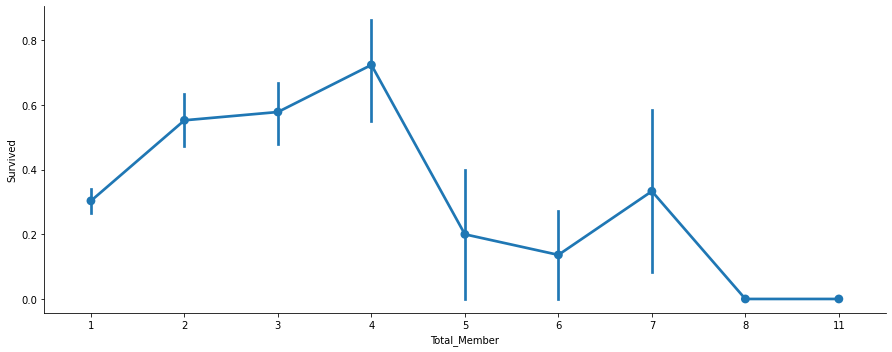

In [39]:
axes = sns.factorplot('Total_Member','Survived',data=titanic, aspect = 2.5, )

In [40]:
# Objective 1 Dropping Columns SibSp and parch as it has already included in Total Member
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)  

#### Checking for Multicollinearity using Variance Inflation Factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(titanic)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const          40.2504
Pclass          1.9188
Survived        1.6584
Fare            1.6499
Sex_female      1.5166
Embarked_Q      1.4881
Embarked_S      1.4683
Age             1.2547
Total_Member    1.2351
dtype: float64

In [42]:
titanic.head()

,Survived,Pclass,Age,Fare,Sex_female,Embarked_Q,Embarked_S,Total_Member
0,0,3,22.0000,7,0,0,1,2
1,1,1,38.0000,71,1,0,0,2
2,1,3,26.0000,7,1,0,1,1
3,1,1,35.0000,53,1,0,1,2
4,0,3,35.0000,8,0,0,1,1


## Building Model using Scikit Learn: Iteration 1

#### Importing test train split package from sklearn library 

In [43]:
from sklearn.model_selection import train_test_split

#### Splitting the data into Train Test Data  

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'],\
                                                    test_size=0.25, random_state=156)

#### Importing logistic Regression from sklearn Library

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logit = LogisticRegression()  #Fit Logistic Regression model.

In [47]:
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
logit.classes_

array([0, 1], dtype=int64)

In [49]:
logit.coef_

array([[-1.08203387e+00, -3.56564068e-02,  8.33572104e-04,
         2.62307770e+00, -2.44825457e-01, -5.57979879e-01,
        -2.11057064e-01]])

In [50]:
predictions=logit.predict(X_test)   #Make class predictions.

In [51]:
logit.score(X_test, Y_test)      #Calculate accuracy score.

0.8071748878923767

In [52]:
1-logit.score(X_test, Y_test)     #Calculate Error rate.

0.19282511210762332

 #### Calculating Accuracy

In [53]:
import sklearn.metrics as metrics    
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(Y_test, predictions)

0.8071748878923767

In [55]:
accuracy_score(Y_test, predictions, normalize=False) #Calculate number of correctly classified observations.

180

In [56]:
len(Y_test) - accuracy_score(Y_test, predictions, normalize=False) #Calculate number of incorrectly classified observations.

43

#### Calculate log loss

In [57]:
from sklearn.metrics import log_loss
import numpy as np

In [58]:
print ("log_loss", metrics.log_loss(Y_test, predictions))   #Encode predicted classes and test labels.

log_loss 6.660011557544094


#### Calculate Confusion Matrix


In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [61]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [62]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,118,19
Actual pos,24,62


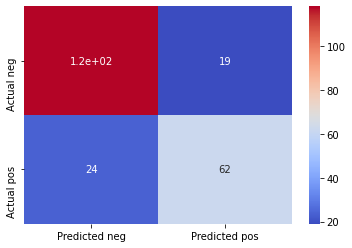

In [63]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

#### Calculate precision and recall scores

In [64]:
from sklearn.metrics import precision_score, recall_score

In [65]:
precision_score(Y_test, predictions)

0.7654320987654321

In [66]:
recall_score(Y_test, predictions)

0.7209302325581395

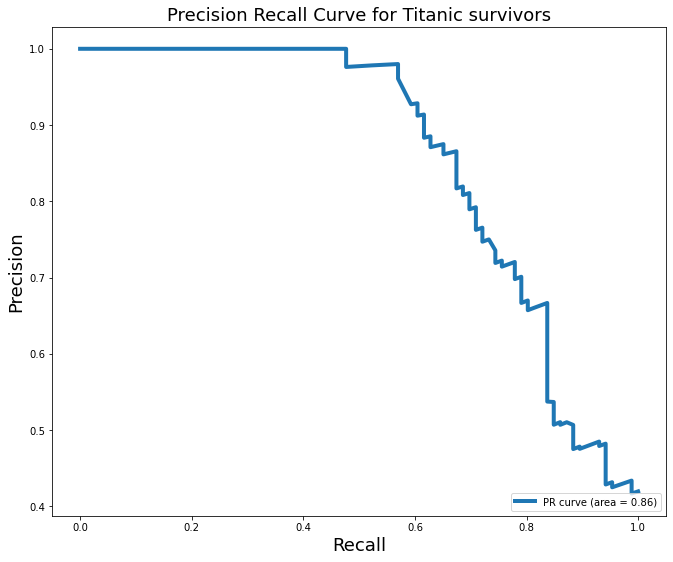

In [67]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve 
y_score = logit.decision_function(X_test)
precision, recall, _ = precision_recall_curve(Y_test, y_score)
PR_AUC = auc(recall, precision)
plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/#:~:text=The%20Precision%2DRecall%20AUC%20is,a%20model%20with%20perfect%20skill.

#### Calculate F1 Score

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(Y_test, predictions)

0.7425149700598802

#### Calculate Area under the ROC curve and also plot the ROC curve

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

In [71]:
probs = logit.predict_proba(X_test)[::,1] #Let's take probablities from our classifier, instead of classes.

In [72]:
auc = roc_auc_score(Y_test, probs)
print(auc)

0.8572822950263113


In [73]:
fpr, tpr, threshold = roc_curve(Y_test, probs)

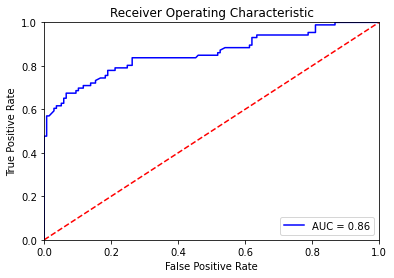

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Calculating the optimal threshold probability from this ROC curve.

In [75]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [76]:
optimal_threshold

0.626180536380019

### Updating model based on optimal probability threshold

In [77]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [78]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)

In [79]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [80]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,128,9
Actual pos,29,57


In [124]:
TN=128
FP=9
FN=29
TP=57
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("The probability of predicting people survived in titanic",specificity)
print("The probability of predicting people survived in titanic correctly is ",sensitivity)

The probability of predicting people survived in titanic 0.9343065693430657
The probability of predicting people survived in titanic correctly is  0.6627906976744186


In [81]:
accuracy_score(Y_test, new_predictions)

0.8295964125560538

In [82]:
log_loss(Y_test, new_predictions)

5.885563674365371

In [83]:
Sklearn_Model_Result=[['Scikit_Iteration 1',0.8071,6.66,0.76,0.72,0.742,0.85,0.626],['Aft_Updating_Threshold',0.8295,5.885,'NA','NA','NA','NA','NA']]
Result_Summary= pd.DataFrame(Sklearn_Model_Result, columns = ['No_of_Iteration','Accuracy', 'Log-Loss','Precision','Recall','F1-Score','AU-ROC','Opt_Threshold'])
Result_Summary

,No_of_Iteration,Accuracy,Log-Loss,Precision,Recall,F1-Score,AU-ROC,Opt_Threshold
0,Scikit_Iteration 1,0.8071,6.6600,0.7600,0.7200,0.7420,0.8500,0.6260
1,Aft_Updating_Threshold,0.8295,5.8850,NA,NA,NA,NA,NA


1. From Scikit Result we can see Accuracy of the Model is 80.71% after updating it with Optimum threshold value it is comming 82.95%. The threshold value is obtained after plotting the ROC Curve. On passing the Accuracy Line we get the Cutoff Point which is closest to Top Left Corner Point whose value is 1. 

2. The Accuracy increases after we get optial cutoff probability and Log-Loss decreases which is good for the model.

3. Precision Usually says how useful the results are: So I can say my model has 76% ability to identify all relevant instances.  The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.76 precision which is pretty good.

4. Recall says how complete the results are: My model has 72% ability to return only relevant instances.                    So,Of all the passengers that truly survived, how many did we label? We have got recall of 0.72 which is good for this model as it’s above 0.5.

5. F1-Score:It is a Single metric that combines recall and precision using the harmonic mean. So closer the F-Score to 1 better is the result. 

6. AU-ROC: 0.85 which is good for our Model.So I can say from my AUC Score that my Survival Classification of Passengers is good.

7. Opt_Threshold: The chosen threshold 0.62 determines the balance between how many false positives and false negatives will result from this classification.

## Building Model using Statsmodel(GLM): iteration 2

**Null hypothesis: The coefficients on the parameters (including interaction terms) of the logistic regression modeling log(odds) of Survived as a function of independent features are zero.**

**Alternative hypothesis: At least one of the coefficients on the parameters (including interaction terms) of the logistic regression modeling log(odds) of Survived as a function of independent features are nonzero.**

**Significance level: 5%**

**Confidence interval: 95%**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'],\
                                                    test_size=0.25, random_state=156)

#### Importing Statsmodel api

In [86]:
import statsmodels.api as sm

In [87]:
X_train = sm.add_constant(X_train)   # Adding Constant Term to X_Train 

In [88]:
Y_train.head()

201    0
345    1
772    0
455    1
242    0
Name: Survived, dtype: int64

In [89]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())   #Fit Logistic Regression.

In [90]:
result = logit.fit()

##### Statsmodel Iteration1

In [91]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  668
Model:                            GLM   Df Residuals:                      660
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -298.90
Date:                Sun, 21 Jun 2020   Deviance:                       597.81
Time:                        23:03:15   Pearson chi2:                     677.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9559      0.605      4.883   

#### Interpretation of above Summary Result:
###### Coefficients Interpretation
1. For every one unit change in Pclass , the log odds of survival decreases by 1.1283.
2. For every one unit increase in Age, the the log odds of being survived decreases by 0.0368
3. For every one unit increase in fare, the log odds of being survived increaes by 0.0005
4. Being a Female member on ship, the log odds of survived increaes by 2.7734.
5. For unit increase in Family Member, the log odds of survival decreases by 0.2243

We can See P-Value of (Fare,Embarked_Q) > Significance Level of 5%. So I will drop columns based on Higher P-Values First.

For Comparing Log-Likelihood, Deviance, Pearson chi2 we will look at the other iterations done on this model.

In [92]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            613.8056  
Link Function:      logit            BIC:            -3695.0246
Dependent Variable: Survived         Log-Likelihood: -298.90   
Date:               2020-06-21 23:03 LL-Null:        -444.64   
No. Observations:   668              Deviance:       597.81    
Df Model:           7                Pearson chi2:   677.      
Df Residuals:       660              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const            2.9559   0.6054  4.8826 0.0000  1.7694  4.1424
Pclass          -1.1283   0.1652 -6.8293 0.0000 -1.4521 -0.8045
Age             -0.0368   0.0088 -4.1947 0.0000 -0.0540 -0.0196
Fare             0.0005   0.0024  0.2209 0.8252 -0.0042

In [93]:
result.params

const           2.9559
Pclass         -1.1283
Age            -0.0368
Fare            0.0005
Sex_female      2.7734
Embarked_Q     -0.3375
Embarked_S     -0.6199
Total_Member   -0.2243
dtype: float64

In [94]:
np.exp(result.params)

const          19.2191
Pclass          0.3236
Age             0.9639
Fare            1.0005
Sex_female     16.0127
Embarked_Q      0.7136
Embarked_S      0.5380
Total_Member    0.7991
dtype: float64

In [95]:
result.deviance

597.8055805198435

In [96]:
result.aic

613.8055805198435

## Stepwise backward Elimination

In [97]:
X_train.drop(["Fare"], axis=1, inplace=True)    #Dropping the Fare Column as it has P-value>0.05

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X = add_constant(titanic)
vifs = [vif(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const          40.2504
Pclass          1.9188
Survived        1.6584
Fare            1.6499
Sex_female      1.5166
Embarked_Q      1.4881
Embarked_S      1.4683
Age             1.2547
Total_Member    1.2351
dtype: float64

##### Statsmodel Iteration 2

In [99]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            611.8549  
Link Function:      logit            BIC:            -3701.4796
Dependent Variable: Survived         Log-Likelihood: -298.93   
Date:               2020-06-21 23:04 LL-Null:        -444.64   
No. Observations:   668              Deviance:       597.85    
Df Model:           6                Pearson chi2:   678.      
Df Residuals:       661              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const            3.0166   0.5404  5.5825 0.0000  1.9575  4.0756
Pclass          -1.1457   0.1455 -7.8729 0.0000 -1.4309 -0.8604
Age             -0.0369   0.0088 -4.2137 0.0000 -0.0541 -0.0197
Sex_female       2.7740   0.2316 11.9784 0.0000  2.3201

In [100]:
X_train.drop(["Embarked_Q"], axis=1, inplace=True)   #Dropping Embarked_Q as it has P-value>0.05

In [101]:
result1= sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()

##### Statsmodel Iteration 3

In [102]:
print(result1.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            610.4657  
Link Function:      logit            BIC:            -3707.3731
Dependent Variable: Survived         Log-Likelihood: -299.23   
Date:               2020-06-21 23:04 LL-Null:        -444.64   
No. Observations:   668              Deviance:       598.47    
Df Model:           5                Pearson chi2:   683.      
Df Residuals:       662              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const            2.9851   0.5371  5.5575 0.0000  1.9323  4.0379
Pclass          -1.1748   0.1409 -8.3398 0.0000 -1.4508 -0.8987
Age             -0.0373   0.0087 -4.2682 0.0000 -0.0544 -0.0202
Sex_female       2.7506   0.2287 12.0295 0.0000  2.3025

In [103]:
result1.deviance

598.4656832208061

In [104]:
result1.aic

610.4656832208061

In [105]:
X_test1 = sm.add_constant(X_test[['Pclass', 'Age', 'Sex_female','Embarked_S','Total_Member']])

In [106]:
probabilites = result1.predict(X_test1)

In [107]:
probabilites.head()

748   0.5360
847   0.1132
760   0.0890
35    0.3290
871   0.8371
dtype: float64

In [108]:
predicted_classes = probabilites.map(lambda x: 1 if x > 0.5 else 0)
accuracy = sum(predicted_classes == Y_test) / len(Y_test)

In [109]:
accuracy = sum(predicted_classes == Y_test) / len(Y_test)

In [110]:
accuracy

0.7937219730941704

In [111]:
log_loss(Y_test, predicted_classes)

7.124676701812628

In [112]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [114]:
confusion_mat = confusion_matrix(Y_test, predicted_classes)


In [115]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [116]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,113,24
Actual pos,22,64


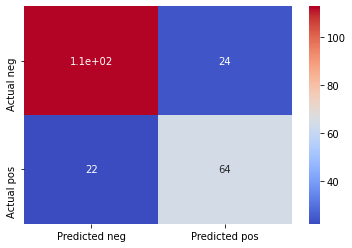

In [117]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [118]:
from sklearn.metrics import precision_score, recall_score

In [119]:
precision_score(Y_test, predicted_classes)

0.7272727272727273

In [120]:
recall_score(Y_test, predicted_classes)

0.7441860465116279

In [121]:
f1_score(Y_test, predicted_classes)

0.735632183908046

In [122]:
TN=113
FP=24
FN=22
TP=64
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("The probability of predicting people survived in titanic",specificity)
print("The probability of predicting people survived in titanic correctly is ",sensitivity)

The probability of predicting people survived in titanic 0.8248175182481752
The probability of predicting people survived in titanic correctly is  0.7441860465116279


In [123]:
Stats_Model_Result=[['Log_Likelyhood',-298,-298.93,-299.23],['Deviance',597.81,597.85,598.47],['Pearson_chi2',677,678,683],['AIC',613.80,611.85,610.46],['BIC',-3695.02,-3701.47,-3707.37]]
Result_Summary2= pd.DataFrame(Stats_Model_Result, columns = ['Parameters','Stats_Iteration1','Iteration2_FareDropped','Iteration2_EmbarkedQ_Dropped'])
Result_Summary2

,Parameters,Stats_Iteration1,Iteration2_FareDropped,Iteration2_EmbarkedQ_Dropped
0,Log_Likelyhood,-298.0000,-298.9300,-299.2300
1,Deviance,597.8100,597.8500,598.4700
2,Pearson_chi2,677.0000,678.0000,683.0000
3,AIC,613.8000,611.8500,610.4600
4,BIC,-3695.0200,-3701.4700,-3707.3700


1. As we can see from the above Summarized table the AIC Score after every Removal of insignificant Value decreases and ended up with the value of 610.46.

2. Deviance represents Goodness of Fit: Though there is slight increase in deviance value which would make model bit less accurate.

References:
1. http://ismayc.github.io/teaching/sample_problems/multiple_logistic.html
2. https://www.statsmodels.org/stable/glm.html
3. https://www.pythonprogramming.in/change-box-color-in-boxplot.html
4. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

**Though the model is not perfect and there is still room for improvement.**